# Data Pre-processing and Cleaning Pipeline

In [1]:
import sys
import os

# Get the absolute path of the parent directory of the current notebook
parent_dir = os.path.dirname(os.path.abspath(os.getcwd()))
# Add the parent directory to the Python path
sys.path.append(parent_dir)

import mne
import pandas as pd
import numpy as np
import preprocessing_pipeline as pipeline
import tqdm

In [2]:
# Path to the raw data file (.cnt format)
# file_path = "path/to/your/raw_data_file.cnt"

In [3]:
base_path = '/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_raw_data'
export_base_path = '/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/'

In [28]:
eeg_file = base_path + '/024/024.cnt'

In [29]:
export_path = export_base_path+ '024'

In [30]:
export_path 

'/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024'

In [31]:
# Load raw EEG data
raw = pipeline.load_eeg_data(eeg_file, eeg_format= 'cnt', use_montage_creator=True, montage_type='standard_1020')

Reading 0 ... 2444119  =      0.000 ...  4888.238 secs...


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:141: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(file, preload=preload)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:141: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(file, preload=preload)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:172: RuntimeWarning: The unit for channel(s) A1, A2 has changed from V to NA.
  raw.set_channel_types({'A1': 'misc', 'A2': 'misc'})
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:55: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['A1', 'A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  self.raw.set_monta

In [32]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: HEOL, HEOR, Fp1, Fp2, VEOU, VEOL, F7, F3, Fz, F4, F8, FT7, FC3, ...
 chs: 4 EOG, 34 EEG, 2 misc
 custom_ref_applied: False
 dig: 37 items (3 Cardinal, 34 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 40
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>

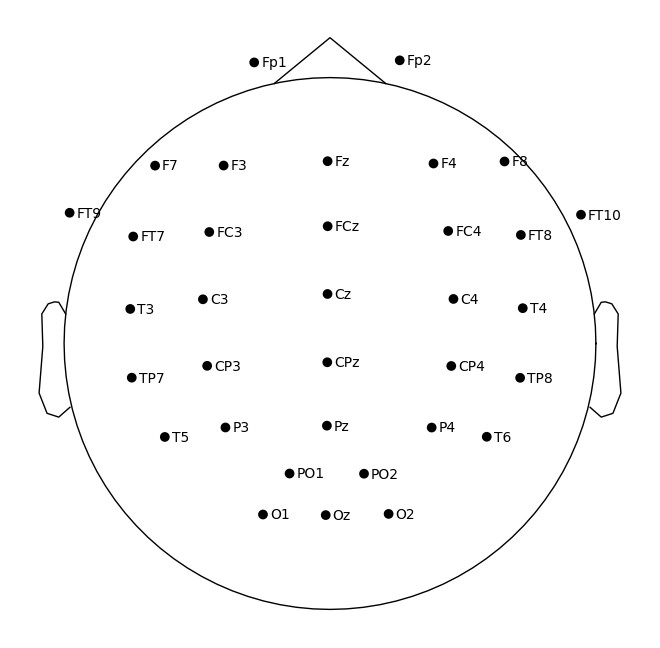

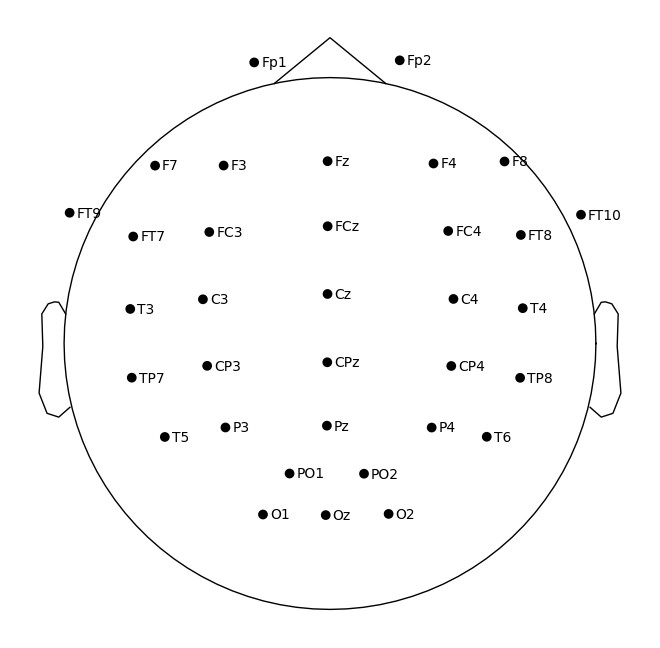

In [33]:
# Now, plot the raw object with sensor locations
raw.plot_sensors(show_names=True)

In [34]:
pipeline.add_stimulus_to_raw(raw)

Creating RawArray with float64 data, n_channels=1, n_times=2444120
    Range : 0 ... 2444119 =      0.000 ...  4888.238 secs
Ready.


<RawCNT | 024.cnt, 41 x 2444120 (4888.2 s), ~764.6 MB, data loaded>

In [35]:
# Find events in the Raw object
events = mne.find_events(raw, stim_channel='STI')

1834 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  21  22  23  24
  25  26  27  28  29  30  31  32  33  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174]


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


1834 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  21  22  23  24
  25  26  27  28  29  30  31  32  33  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174]


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.3s finished


1834 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  21  22  23  24
  25  26  27  28  29  30  31  32  33  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174]
Interpolating bad channels
    Automatic origin fit: head of radius 94.1 mm
Computing interpolation matrix from 8 sensor positions
Interpolating 26 sensors
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 34 channels (please be patient, this may take a while)
Selecting by number: 20 components


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:436: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (21) and smallest (1e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 7
  self.ica.fit(self.data)


Fitting ICA took 34.3s.
Error while processing ECG artifact: Unable to generate artificial ECG channel
Using EOG channels: HEOL, HEOR, VEOU, VEOL
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


EOG component(s) found: []


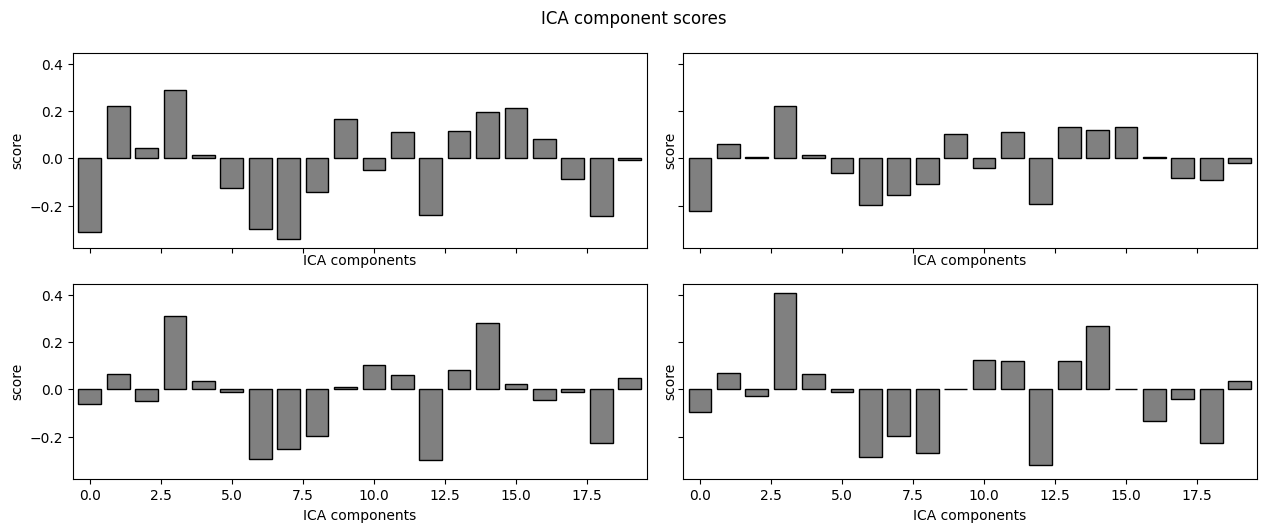

Error while processing EOG artifact: No appropriate components found for the given picks ([])
Effective window size : 8.192 (s)
EMG component(s) found: [6, 7, 8, 17]


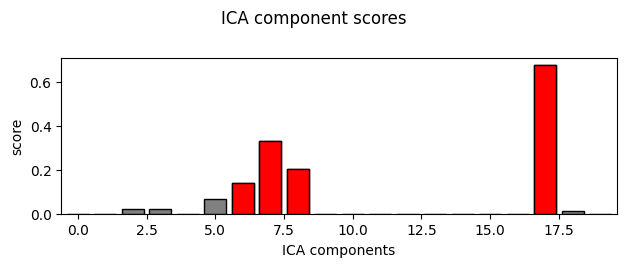

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
2444 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2444 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2444 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2444 matching events found
No baseline correction applied
0 projection items activated


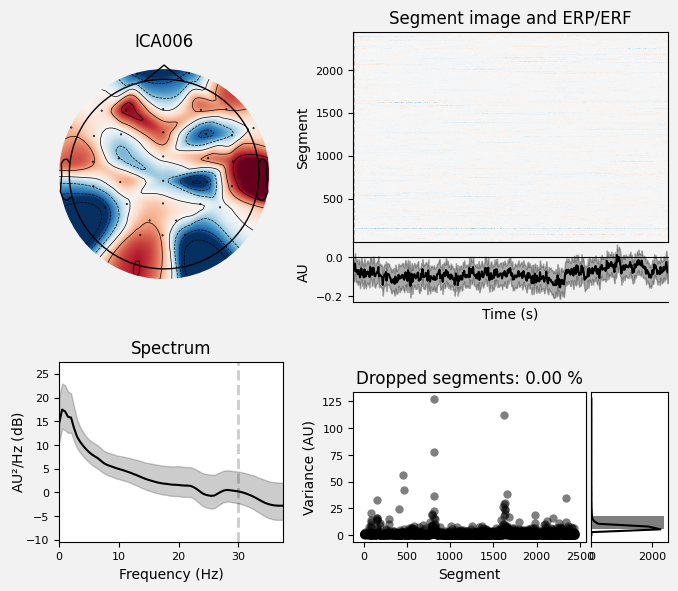

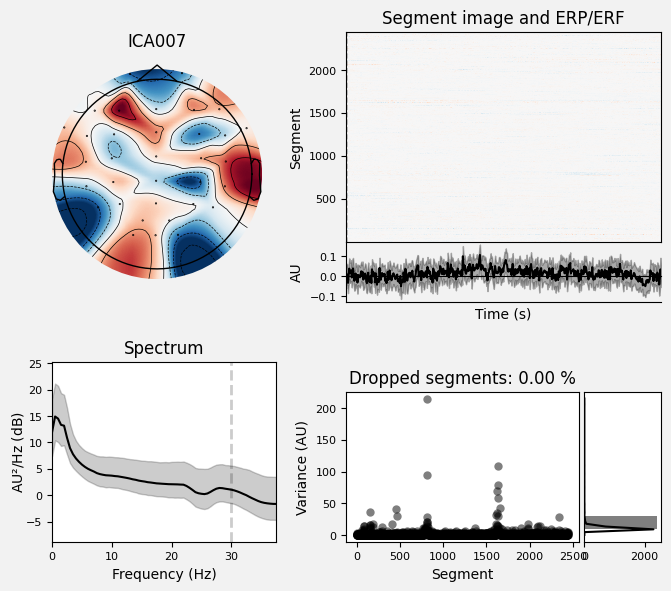

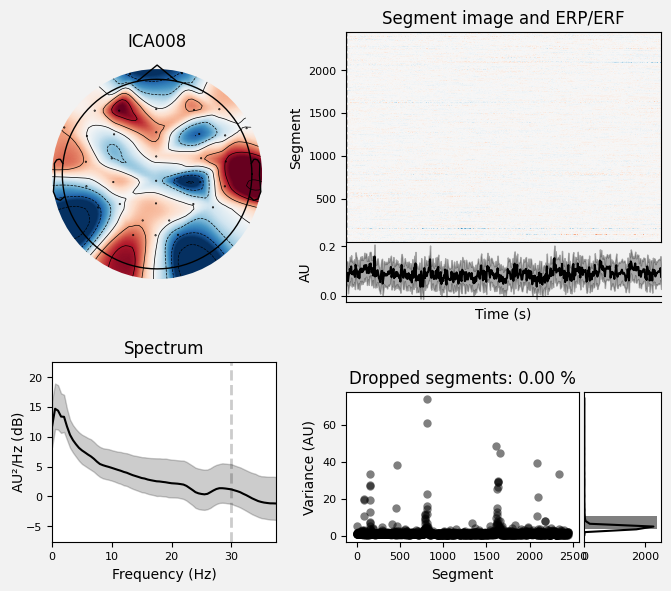

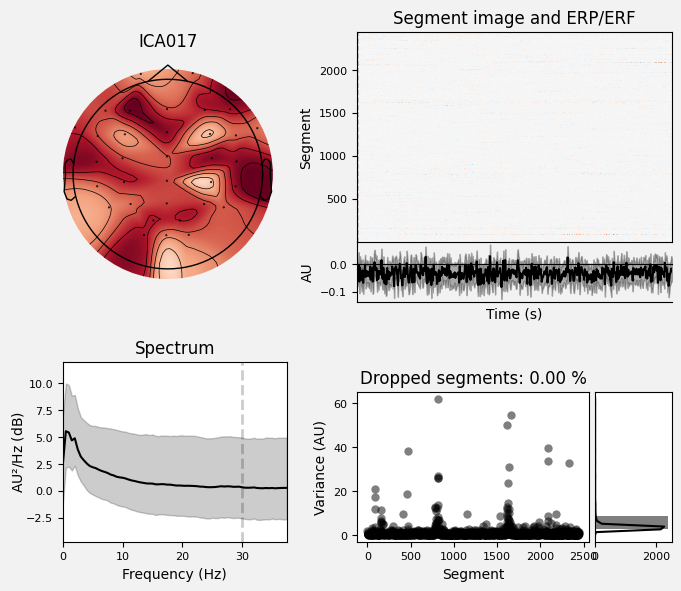

Creating RawArray with float64 data, n_channels=24, n_times=1222060
    Range : 0 ... 1222059 =      0.000 ...  4888.236 secs
Ready.


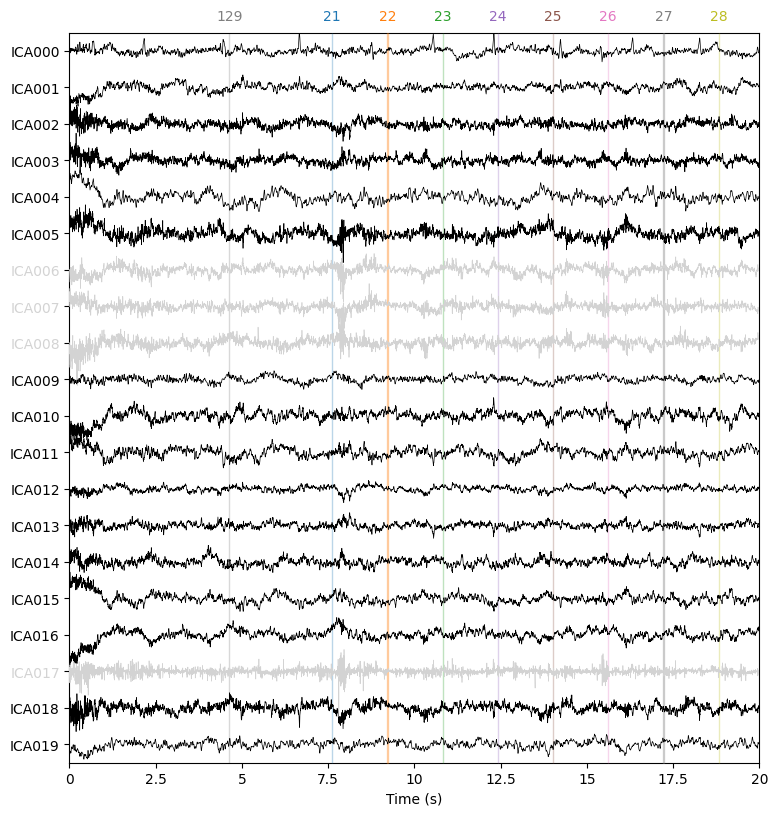

Combined artifact components: [8, 17, 6, 7]
Identified bad channels: []
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 4 ICA components
    Projecting back using 34 PCA components
1834 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  21  22  23  24
  25  26  27  28  29  30  31  32  33  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174]


<RawCNT | 024.cnt, 41 x 1222060 (4888.2 s), ~382.3 MB, data loaded>

In [36]:
# Step 1: Remove power line noise at 50Hz
raw = pipeline.remove_powerline_noise(raw, 50)

# Step 2: High-pass filter at 0.5Hz
raw = pipeline.apply_highpass_filter(raw, 0.5)

# Step 3: Low-pass filter at 30Hz
raw = pipeline.apply_lowpass_filter(raw, 30)

# Step 4: Down-sampling to 250Hz
raw = pipeline.resample_data(raw, 250)

# Step 5: Interpolation of noisy electrodes
# First, detect the bad channels.
bad_channels = pipeline.detect_bad_channels(raw)
# Then, interpolate the detected bad channels.
raw = pipeline.interpolate_bad_electrodes(raw, bad_channels)

# Step 6: Average re-referencing
raw = pipeline.average_rereference(raw)

# Step 7: ICA decomposition and removal of artifacts
ica_tool = pipeline.ICAChannelSelection(n_component=20, data=raw)  # You may adjust `n_component` based on your needs.
ica_tool.fit_ica()

# Identify and label artifact components
combined_artifacts = ica_tool.find_combined_artifacts()

# Apply ICA to remove the identified artifact components
cleaned_data = ica_tool.apply_ica(combined_artifacts)

# Step 8: Removal of random noisy EEG markers
pipeline.remove_noisy_markers(cleaned_data, min_distance=250)

In [37]:
# Step 9: Data epoching (window -200 to 800 ms) and 
# Step 10: Baseline correction (window -200ms to 0 ms)

# Create an instance of the DataEpoching class using the preprocessed raw data (cleaned_data)
# and the specified folder path (export_base_path) to save the epoching data
data_epoching = pipeline.DataEpoching(cleaned_data, export_path)

# Input event ID and epoch time ranges:
# This step allows the user to input the event IDs that they are interested in,
# and the corresponding time ranges (tmin and tmax) for epoching the data
data_epoching.input_event_time_ranges()

# Input the baseline correction window:
# This step allows the user to input the baseline correction window (tmin and tmax)
# that will be used to perform baseline correction on the epoch data
# In  this study, we use the 200 ms time window immediately preceding Event 21, 
# which is the first word event, as the baseline for EEG data analysis."
data_epoching.input_baseline_event_time_range()

# Epoch the data using the provided information:
# This step will create epochs of the EEG data based on the inputted event IDs and
# epoch time ranges. It will then apply baseline correction to each epoch
# using the specified baseline correction window. The epochs will be saved to the
# folder specified in the export_base_path variable
data_epoching.epoch_data()

Do you want to use the same time range for all events? (yes/no): yes
Enter the common start time for all epochs (e.g. -0.2): -0.2
Enter the common end time for all epochs (e.g. 0.8): 0.8
Enter event ID (or 'exit' to stop): 1
Enter event ID (or 'exit' to stop): 2
Enter event ID (or 'exit' to stop): 3
Enter event ID (or 'exit' to stop): 4
Enter event ID (or 'exit' to stop): 5
Enter event ID (or 'exit' to stop): 6
Enter event ID (or 'exit' to stop): 7
Enter event ID (or 'exit' to stop): 8
Enter event ID (or 'exit' to stop): 9
Enter event ID (or 'exit' to stop): 10
Enter event ID (or 'exit' to stop): 11
Enter event ID (or 'exit' to stop): 12
Enter event ID (or 'exit' to stop): 13
Enter event ID (or 'exit' to stop): 14
Enter event ID (or 'exit' to stop): 21
Enter event ID (or 'exit' to stop): exit
Enter the event ID to be used as a baseline (e.g. '21'): 21
Enter the start time for the baseline of event ID '21' (e.g. -0.2): -0.2
Enter the end time for the baseline of event ID '21' (e.g. 0): 

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep1.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep1_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pip

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep2_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep3.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pip

Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep4.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep4_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep5.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep5_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pip

Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep7.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep7_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)


Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep8.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep8_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pip

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep9_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep10.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pi

Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep11_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep12.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)


Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep12_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep13.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)


Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep13_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep14.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)


Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep14_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:890: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep21.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)


Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:898: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep21_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)


In [38]:
# Step 11: Epochs averaging
# Event IDs and their corresponding labels
event_ids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
"""
labels = {
    '1': 'I know',
    '2': 'FOK',
    '3': 'I do not know',
    '4': 'correct answer choice',
    '5': 'incorrect answer choice',
    '6': 'I do not know (answer choice)',
    '7': 'low confidence',
    '8': 'high confidence',
    '9': 'I want to know',
    '10': 'I do not want to know'
}
"""

# # Mapping of levels to event IDs
# level_mapping = {
#     'META': ['1', '2', '3'],  # METAMEMORY Levels; KNOW, FOK, NKNOW
#     'MR': ['4', '5', '6'],    # MEMORY RETRIEVAL Levels; Correct answer(MR-C), Incorrect answer(MR-I),I do not know the answer(MR-N)
#     'CJ': ['7', '8'],         # CONFIDENCE JUDGMENT Levels; Low, High
#     'SD': ['9', '10']         # SEARCH DECISION Levels; SEARCH, NOSEARCH
# }

level_mapping = {
    'KNOW': ['1'],  
    'FOK': ['2'],   
    'NKNOW': ['3'], 
    'MR-C': ['4'],  
    'MR-I': ['5'],  
    'MR-N': ['6'],  
    'CJ-Low': ['7'], 
    'CJ-High': ['8'],
    'SD-SEARCH': ['9'], 
    'SD-NOSEARCH': ['10']
}

# Extract all event IDs from the mapping
all_events = [event for sublist in level_mapping.values() for event in sublist]

# Paths for operations
folder_path = export_path  # Path to folder containing epochs
save_directory = export_path  # Directory to save the results

# Load the epochs and process them
loaded_epochs = pipeline.load_epochs(folder_path, all_events)
pipeline.average_epochs_by_level(loaded_epochs, level_mapping, save_directory)

Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep1.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep2.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep3.cnt ...


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep1.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep2.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preproces

    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep4.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep5.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
36 matching events found
No baseline correction applied


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep4.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep5.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)


Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep6.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep7.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
63 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep8.cnt ...


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep6.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep7.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preproces

    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep9.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep10.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
4 matching events found
No baseline correction applied
0

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep9.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:929: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/024_ep10.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  loaded_epochs[event_id] = mne.read_epochs(epoch_file, preload=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preproce

Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
36 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
8 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
63 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
49 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
4 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:954: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-C_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs.save(averaged_file_path, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:947: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_epochs = mne.concatenate_epochs(epochs_for_level)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:954: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-I_average

/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/KNOW_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/KNOW_averaged-ep.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (1)
        0 CTF compensation matrices available
        nave = 23 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/FOK_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/0

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/KNOW_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/FOK_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)


/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/NKNOW_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/NKNOW_averaged-ep.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (3)
        0 CTF compensation matrices available
        nave = 38 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-C_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_dat

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/NKNOW_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-C_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)


/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-I_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-I_averaged-ep.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (5)
        0 CTF compensation matrices available
        nave = 36 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-N_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-I_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/MR-N_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)


/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/CJ-Low_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/CJ-Low_averaged-ep.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (7)
        0 CTF compensation matrices available
        nave = 63 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/CJ-High_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epochin

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/CJ-Low_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/CJ-High_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)


        0 CTF compensation matrices available
        nave = 49 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/SD-SEARCH_averaged-ep.cnt
Reading /var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/SD-SEARCH_averaged-ep.cnt ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (9)
        0 CTF compensation matrices available
        nave = 4 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/S

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/SD-SEARCH_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:980: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/024/SD-NOSEARCH_averaged-ep.cnt) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  averaged_epochs = mne.read_evokeds(avg_file_path)


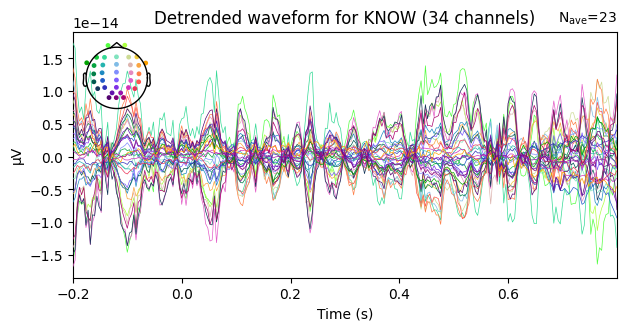

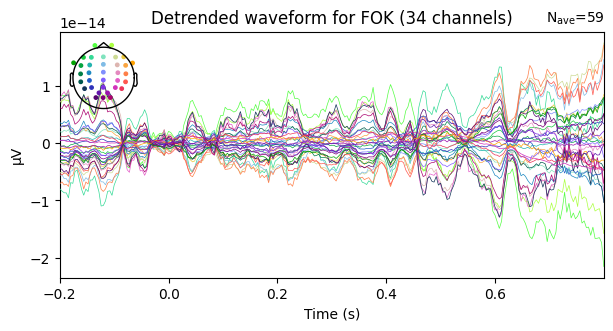

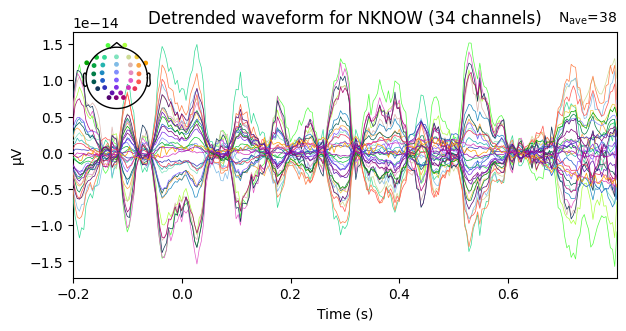

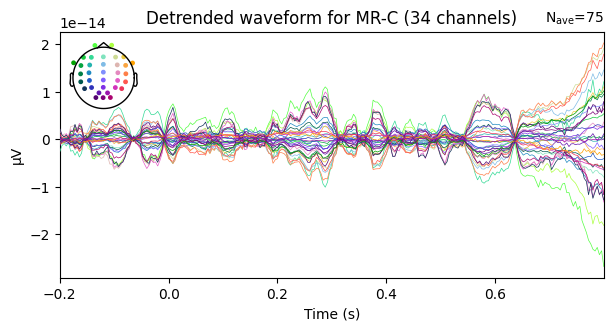

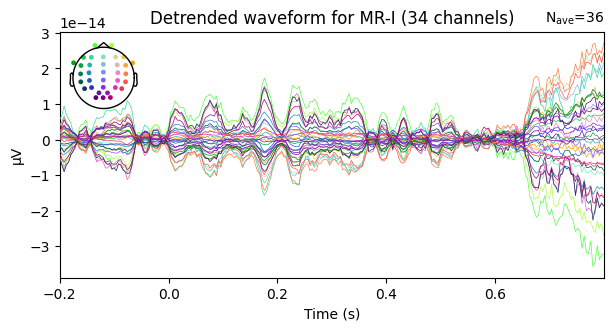

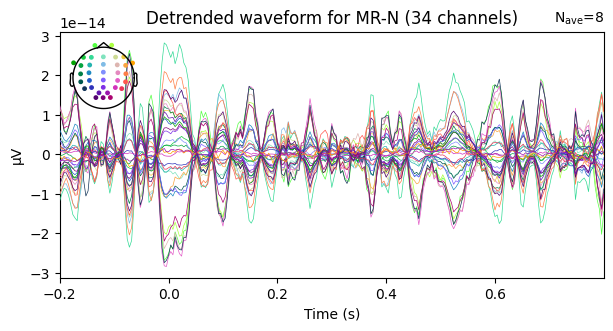

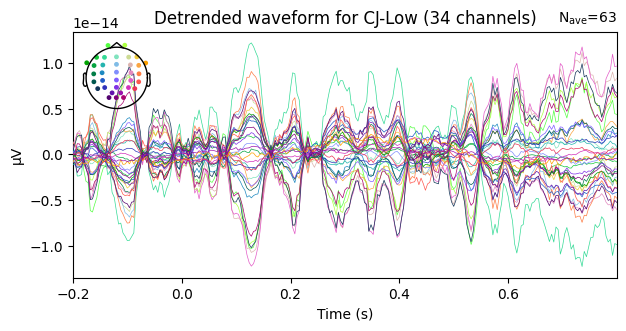

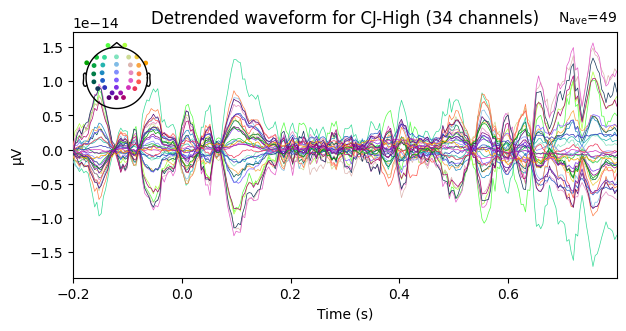

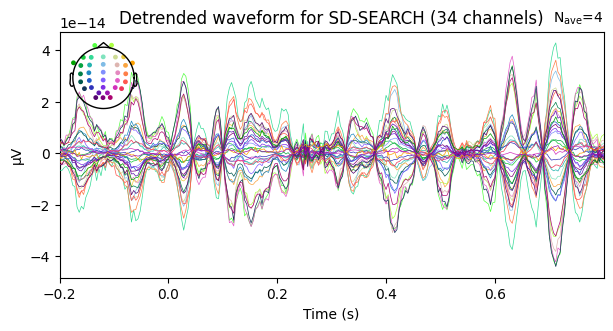

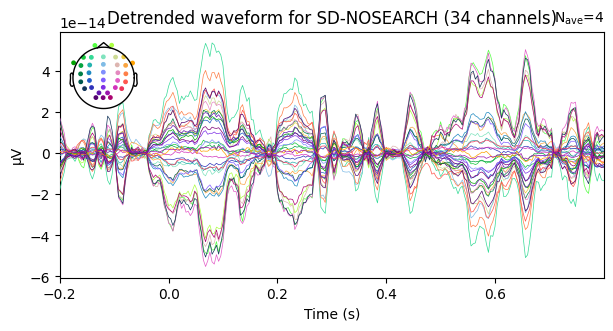

In [39]:
# Step 12: Removal of the mean for each channel
level_mapping = {
    'KNOW': ['1'],  
    'FOK': ['2'],   
    'NKNOW': ['3'], 
    'MR-C': ['4'],  
    'MR-I': ['5'],  
    'MR-N': ['6'],  
    'CJ-Low': ['7'], 
    'CJ-High': ['8'],
    'SD-SEARCH': ['9'], 
    'SD-NOSEARCH': ['10']
}

detrended_data = pipeline.subtract_grand_mean(save_directory=save_directory, level_mapping=level_mapping)

for condition, evoked in detrended_data.items():
    evoked.plot(titles=f'Detrended waveform for {condition}', time_unit='s')

In [4]:
for i in range(1, 25):
    folder_name = str(i).zfill(3)  # Pad with zeros to get 001, 002, ...
    file_name = f"{folder_name}.cnt"
    eeg_file = os.path.join(base_path, folder_name,file_name)
    
    print(eeg_file)
    
    # Export epoch to .fif
    export_path = os.path.join(export_base_path, folder_name)
    print(export_path)

/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_raw_data/001/001.cnt
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/001
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_raw_data/002/002.cnt
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/002
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_raw_data/003/003.cnt
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/003
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.u

In [19]:
# Get the base file name
base_file_name = export_path.split('/')[-1]

original_epoch_file = os.path.join(export_path, f"{base_file_name}_ep.cnt")
print(original_epoch_file)

/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/002/002_ep.cnt


# Loop through each folder and process the .cnt files at once

In [4]:
base_path = '/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_raw_data'
export_base_path = '/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/'

/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_raw_data/012/012.cnt
/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012
Reading 0 ... 2733759  =      0.000 ...  5467.518 secs...


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:141: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(file, preload=preload)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:141: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(file, preload=preload)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:172: RuntimeWarning: The unit for channel(s) A1, A2 has changed from V to NA.
  raw.set_channel_types({'A1': 'misc', 'A2': 'misc'})
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:55: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['A1', 'A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  self.raw.set_monta

Creating RawArray with float64 data, n_channels=1, n_times=2733760
    Range : 0 ... 2733759 =      0.000 ...  5467.518 secs
Ready.
1837 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  21  22  23
  24  25  26  27  28  29  30  31  32  33  41  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 170
 171 172 173 174 175]
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


1837 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  21  22  23
  24  25  26  27  28  29  30  31  32  33  41  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 170
 171 172 173 174 175]


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.7s finished


1837 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  21  22  23
  24  25  26  27  28  29  30  31  32  33  41  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 170
 171 172 173 174 175]
Interpolating bad channels
    Automatic origin fit: head of radius 94.1 mm
Computing interpolation matrix from 14 sensor positions
Interpolating 20 sensors
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 34 channels (please be patient, this may take a while)
Selecting by number: 20 components


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:436: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (19) and smallest (1.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  self.ica.fit(self.data)


Fitting ICA took 42.3s.
Error while processing ECG artifact: Unable to generate artificial ECG channel
Using EOG channels: HEOL, HEOR, VEOU, VEOL
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


EOG component(s) found: []


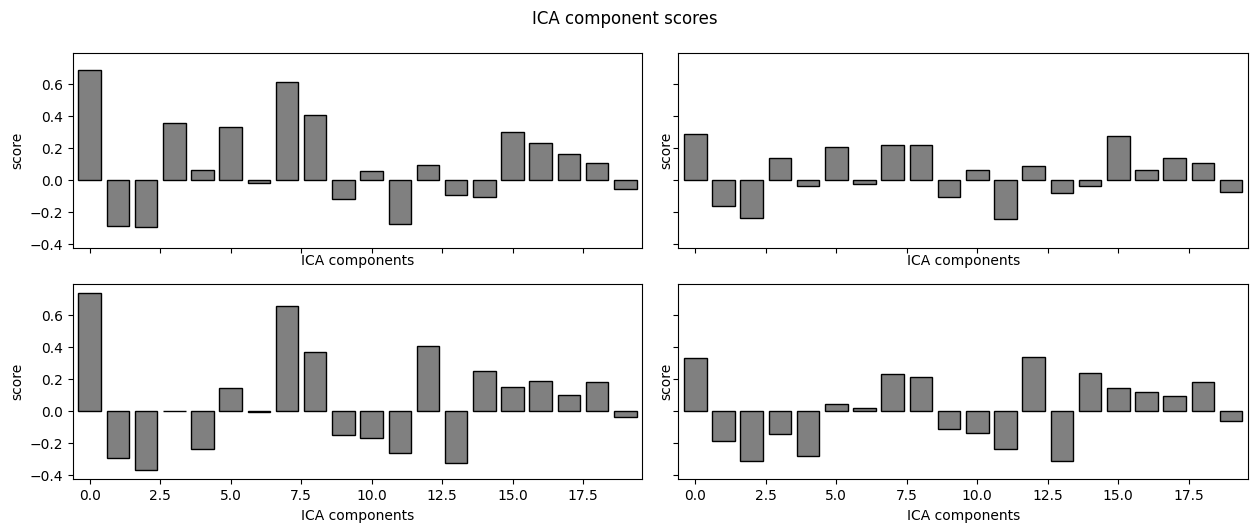

Error while processing EOG artifact: No appropriate components found for the given picks ([])
Effective window size : 8.192 (s)
EMG component(s) found: [1]


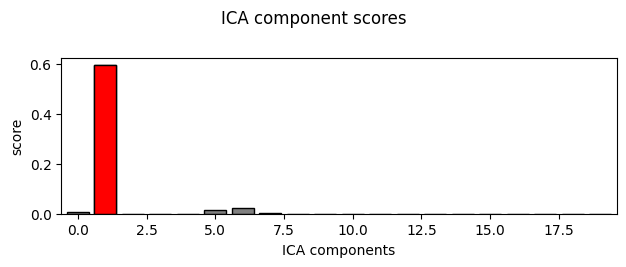

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
2733 matching events found
No baseline correction applied
0 projection items activated


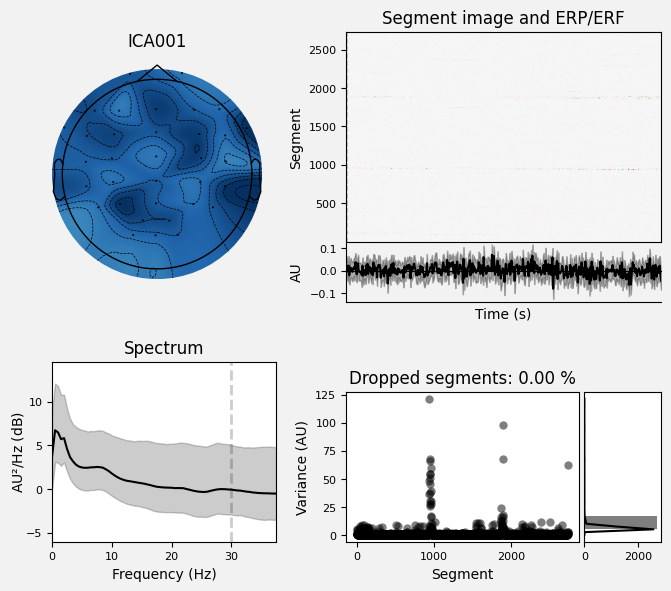

Creating RawArray with float64 data, n_channels=24, n_times=1366880
    Range : 0 ... 1366879 =      0.000 ...  5467.516 secs
Ready.
Using matplotlib as 2D backend.


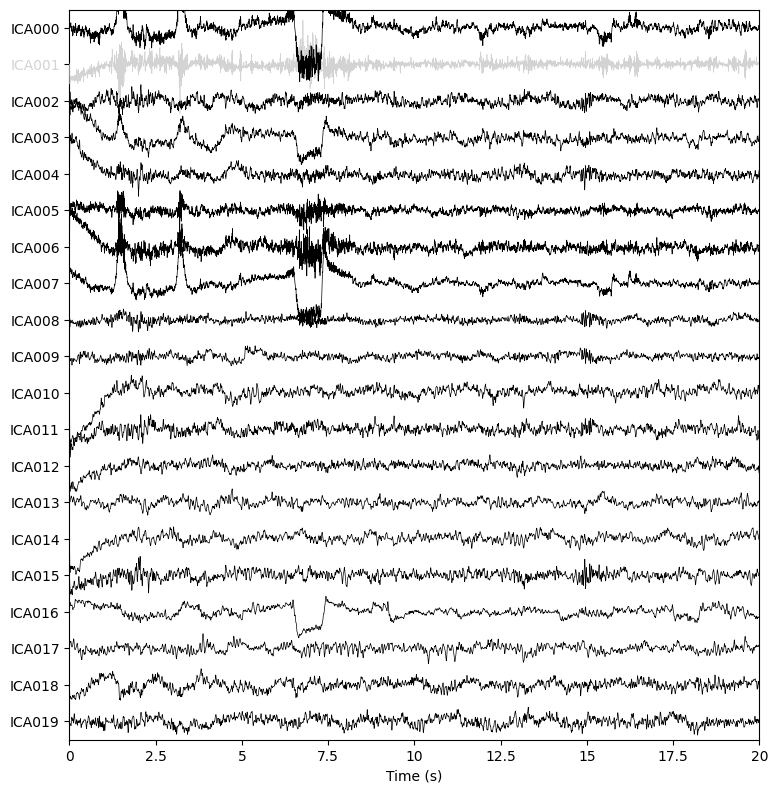

Combined artifact components: [1]
Identified bad channels: []
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 34 PCA components
1837 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  21  22  23
  24  25  26  27  28  29  30  31  32  33  41  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 170
 171 172 173 174 175]
Do you want to use the same time range for all events? (yes/no): yes
Enter the common start time for all epochs (e.g. -0.2): -0.2
Enter the common end t

/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:945: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep1.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:953: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep1_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pip

Applying baseline correction (mode: mean)
Overwriting existing file.
Not setting metadata
19 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 19 events and 251 original time points ...
0 bad epochs dropped
Overwriting existing file.


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:953: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep2_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:945: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep3.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)


Applying baseline correction (mode: mean)
Overwriting existing file.
Not setting metadata
53 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 53 events and 251 original time points ...
0 bad epochs dropped
Overwriting existing file.
Applying baseline correction (mode: mean)


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:953: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep3_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:945: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep4.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pip

Overwriting existing file.
Not setting metadata
23 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 23 events and 251 original time points ...
0 bad epochs dropped
Overwriting existing file.
Applying baseline correction (mode: mean)
Overwriting existing file.
Not setting metadata
44 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 44 events and 251 original time points ...
0 bad epochs dropped
Overwriting existing file.


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:945: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep5.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(original_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:953: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep5_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)
/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pip

Applying baseline correction (mode: mean)
Overwriting existing file.
An error occurred: Event time samples were not unique. Consider setting the `event_repeated` parameter."


/home/wjb19242/Engine/Projects/IR_EEG/utils/data_preprocessing_pipeline.py:953: RuntimeWarning: This filename (/var/run/user/1137212253/gvfs/smb-share:server=its-idrive9.ds.strath.ac.uk,share=idrive9/Science_CIS-YASHMOSH/kunjirakingphai/Dominika_epoching_data/012/012_ep6_baseline_corrected.cnt) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[key].save(corrected_epoch_file, overwrite=True)


In [5]:
for i in range(12, 13):
    folder_name = str(i).zfill(3)  # Pad with zeros to get 001, 002, ...
    file_name = f"{folder_name}.cnt"
    eeg_file = os.path.join(base_path, folder_name,file_name)

    print(eeg_file)

    # Export epoch to .fif
    export_path = os.path.join(export_base_path, folder_name)
    print(export_path)
    
    # Load raw EEG data
    raw = pipeline.load_eeg_data(eeg_file, eeg_format= 'cnt', use_montage_creator=True, montage_type='standard_1020')
    pipeline.add_stimulus_to_raw(raw)
    # Find events in the Raw object
    events = mne.find_events(raw, stim_channel='STI')
    
    # Step 1: Remove power line noise at 50Hz
    raw = pipeline.remove_powerline_noise(raw, 50)

    # Step 2: High-pass filter at 0.5Hz
    raw = pipeline.apply_highpass_filter(raw, 0.5)

    # Step 3: Low-pass filter at 30Hz
    raw = pipeline.apply_lowpass_filter(raw, 30)

    # Step 4: Down-sampling to 250Hz
    raw = pipeline.resample_data(raw, 250)

    # Step 5: Interpolation of noisy electrodes
    # First, detect the bad channels.
    bad_channels = pipeline.detect_bad_channels(raw)
    # Then, interpolate the detected bad channels.
    raw = pipeline.interpolate_bad_electrodes(raw, bad_channels)

    # Step 6: Average re-referencing
    raw = pipeline.average_rereference(raw)

    # Step 7: ICA decomposition and removal of artifacts
    ica_tool = pipeline.ICAChannelSelection(n_component=20, data=raw)  # You may adjust `n_component` based on your needs.
    ica_tool.fit_ica()

    # Identify and label artifact components
    combined_artifacts = ica_tool.find_combined_artifacts()

    # Apply ICA to remove the identified artifact components
    cleaned_data = ica_tool.apply_ica(combined_artifacts)

    # Step 8: Removal of random noisy EEG markers
    pipeline.remove_noisy_markers(cleaned_data, min_distance=250)
    
    # Step 9: Data epoching (window -200 to 800 ms) and 
    # Step 10: Baseline correction (window -200ms to 0 ms)

    data_epoching = pipeline.DataEpoching(cleaned_data, export_path)
    # Input event ID and epoch time ranges:
    data_epoching.input_event_time_ranges()
    # Input the baseline correction window:
    data_epoching.input_baseline_event_time_range()
    # Epoch the data using the provided information:
    data_epoching.epoch_data()   